### Ejercicio 1: Preparar ambiente de trabajo

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../../utils/')

from calidad_datos import calidad_datos

import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 80 # resolución gráficos
sns.set_style('darkgrid')

In [65]:
# lectura archivo
df = pd.read_csv('compresive_strength_concrete.csv')

In [66]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [67]:
# estadísticas descriptivas
calidad_datos(df)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
Age (day),int64,0,0.0,0,0.000000,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,49.000,-66.5000,129.5000,59
Cement (component 1)(kg in a m^3 mixture),float64,0,0.0,0,0.000000,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,157.625,-44.0625,586.4375,0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),float64,0,0.0,471,0.457282,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,142.950,-214.4250,357.3750,2
Fly Ash (component 3)(kg in a m^3 mixture),float64,0,0.0,566,0.549515,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,118.300,-177.4500,295.7500,0
Water (component 4)(kg in a m^3 mixture),float64,0,0.0,0,0.000000,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,27.100,124.2500,232.6500,9
Superplasticizer (component 5)(kg in a m^3 mixture),float64,0,0.0,379,0.367961,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,10.200,-15.3000,25.5000,10
Coarse Aggregate (component 6)(kg in a m^3 mixture),float64,0,0.0,0,0.000000,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,97.400,785.9000,1175.5000,0
Fine Aggregate (component 7)(kg in a m^3 mixture),float64,0,0.0,0,0.000000,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,93.050,591.3750,963.5750,5
"Concrete compressive strength(MPa, megapascals)",float64,0,0.0,0,0.000000,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,22.425,-9.9275,79.7725,4


### Ejercicio 2: Descripción

Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y
distribución. Decide si es necesario normalizarlos/escalarlos

#### Visualizamos atributos vs variable objetivo

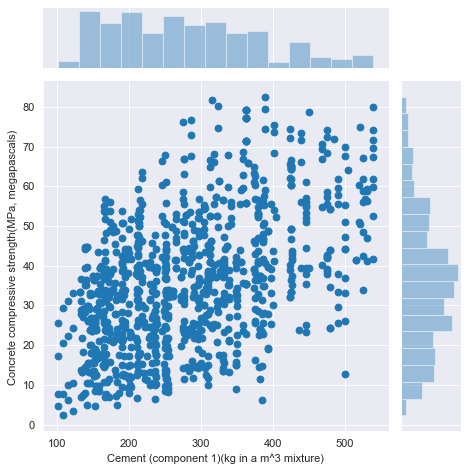

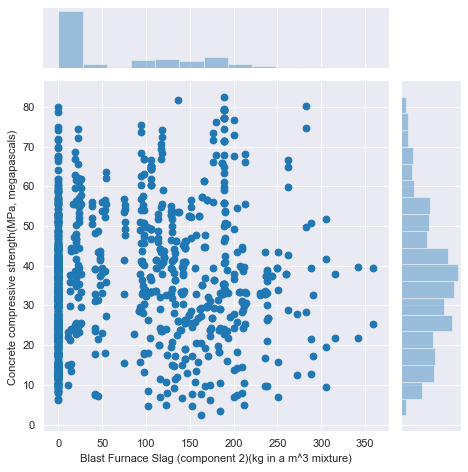

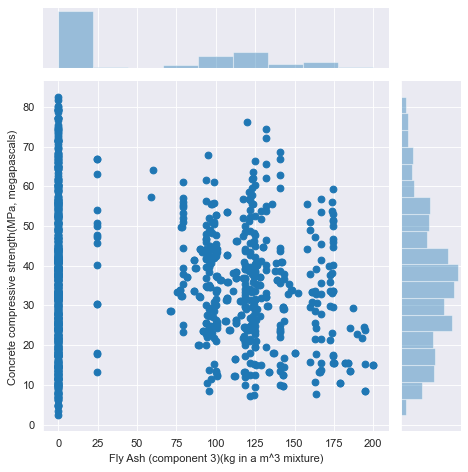

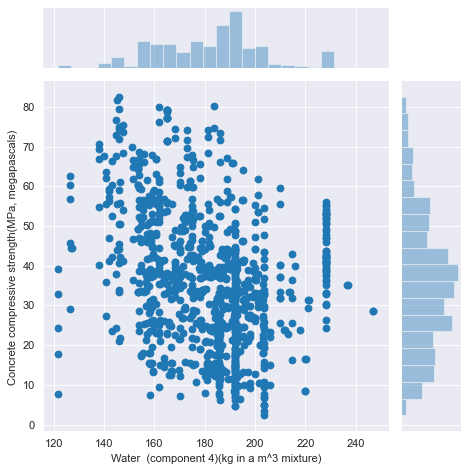

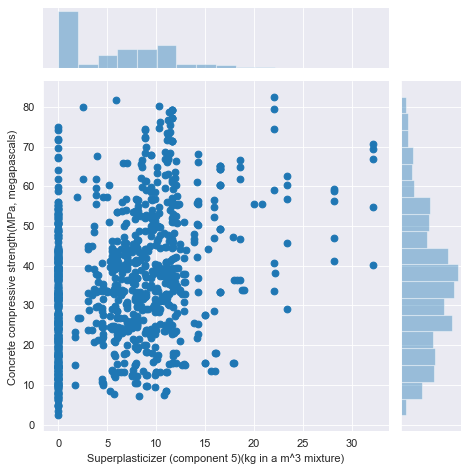

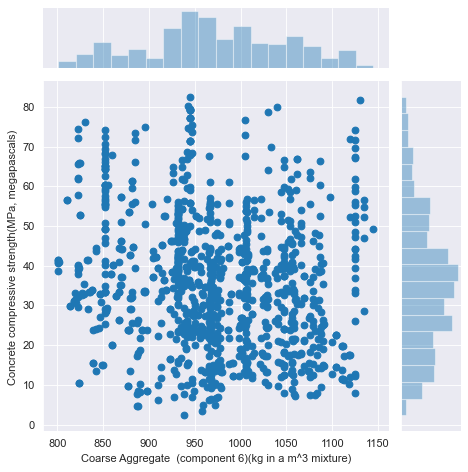

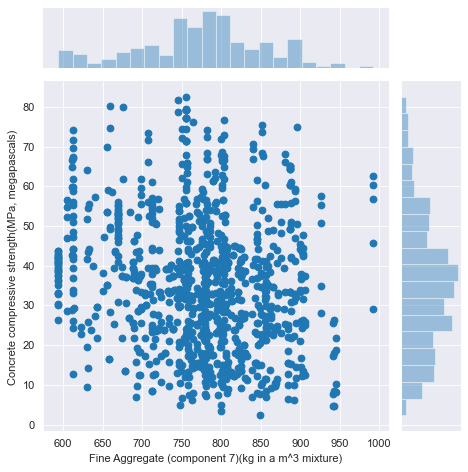

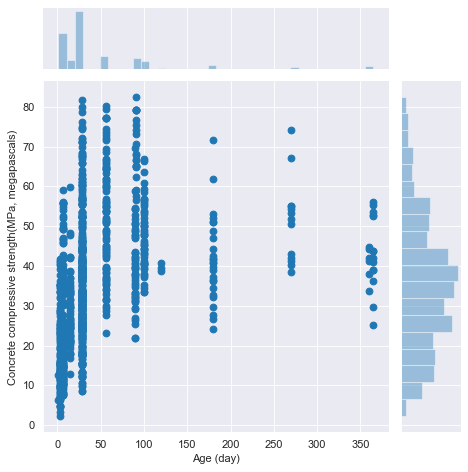

In [68]:
for i, col in enumerate(df.iloc[:, :-1].columns):
    sns.jointplot(x=df.iloc[:, i], y=df.iloc[:, -1])

A partir de los gráficos anteriores se observa que:

* Existe una evidente correlación positiva entre la cantidad de cemento y la fortaleza del concreto
* Las variables "Blast Furnace Slag" y "Fly Ash", tienen una gran cantidad de valores iguales a cero; y su distribución no demuestra a priori una relación evidente con la V.O
* "Superplasticizer" tiene una gran cantidad de nulos, pero sus resultados insinuan una leve relación directa con la V.O
* "Age" es una variable categórica que está sesgada a valores pequeños; se podría pensar que se construye principalmente a principios de cada año
* Todas las variables son numéricas a excepción de "Age"

En cuanto a normalización:

* Debido a que variables como "Fly Ash" tienen valores muy pequeños en relación a otras como "Fine Aggregate", será necesario aplicar normalización sobre las variables

### Ejercicio 3: Modelo

Dado la naturaleza del vector objetivo, el cual es un vector numérico no categórico; decidimos utilizar un modelo linear para su predicción.

In [69]:
from pygam import LinearGAM
from pygam import s

from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [70]:
# generamos conjuntos de entrenamiento y validación
mat_attr = df.iloc[:, :-1]
X_train_prev, X_test_prev, y_train, y_test = train_test_split(mat_attr, df.iloc[:, -1], test_size=.3, random_state=11238)

In [71]:
# escalamos los datos
scaler = StandardScaler().fit(X_train_prev)

X_train = pd.DataFrame(scaler.transform(X_train_prev), columns = X_train_prev.columns)
X_test = pd.DataFrame(scaler.transform(X_test_prev), columns = X_test_prev.columns)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Ajustamos los datos sin uso de GridSearch

In [72]:
gam = LinearGAM(s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7), fit_intercept=True)
gam.fit(X_train.values, y_train.values)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [73]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     80.2121
Link Function:                     IdentityLink Log Likelihood:                                 -3043.3317
Number of Samples:                          721 AIC:                                             6249.0876
                                                AICc:                                            6269.9916
                                                GCV:                                               33.3179
                                                Scale:                                             26.7201
                                                Pseudo R-Squared:                                   0.9151
Feature Function                  Lam

Función para métricas de desempeño

In [74]:
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test Median Absolute Error: {0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))

In [75]:
report_gam_metrics(gam, X_test, y_test)

Test R^2: 0.889
Test RMSE: 5.545
Test Median Absolute Error: 3.667


A partir de los resultados anteriores se obtiene que:

* Los atributos incorporados al modelo explican un 88.9% de la V.O, demostrando un RMSE de 5.545 y MAE de 3.667; resultados que muestran un bajo error de nuestro modelo
* El hiperparámetro lambda corresponde a 0.6
* Todos los atributos se muestran significativos, ya que tienen un valor p menor a 0.05

Ajuste con GridSearch

In [76]:
# rango de lambdas
lam = np.logspace(-3, 3, 3)
lams = [lam] * 8

In [77]:
gam1 = LinearGAM(s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7), fit_intercept=True)
gam1.gridsearch(X_train.values, y_train.values, lam=lams)

  0% (0 of 6561) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (2 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:05:42
  0% (5 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:05:17
  0% (8 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:05:09
  0% (11 of 6561) |                      | Elapsed Time: 0:00:00 ETA:   0:05:04
  0% (14 of 6561) |                      | Elapsed Time: 0:00:00 ETA:   0:05:06
  0% (16 of 6561) |                      | Elapsed Time: 0:00:00 ETA:   0:05:10
  0% (19 of 6561) |                      | Elapsed Time: 0:00:00 ETA:   0:05:10
  0% (22 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:05:07
  0% (25 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:05:05
  0% (27 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:05:37
  0% (28 of 6561) |                      | Elapsed Time: 0:00:01 ETA:   0:05:55
  0% (30 of 6561) |                     

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [81]:
gam1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     71.3982
Link Function:                     IdentityLink Log Likelihood:                                 -3036.1477
Number of Samples:                          721 AIC:                                             6217.0918
                                                AICc:                                            6233.5028
                                                GCV:                                               32.1126
                                                Scale:                                             26.4445
                                                Pseudo R-Squared:                                   0.9148
Feature Function                  Lam

In [79]:
report_gam_metrics(gam1, X_test, y_test)

Test R^2: 0.889
Test RMSE: 5.534
Test Median Absolute Error: 3.433


Resultados:

* Se mantiene la explicación de 88.9% sobre la V.O
* Los parámetros lambda difieren al primer modelo. De echo, se penaliza fuertemente a la variable "Blast Furnace", con un parámetro lambda=1000; y se favorece hacia la variable "Age" disminuyendo a 0.001. Para las demás variables, se entrega un lambda igual a 1
* Los errores varían levemente, disminuyendo a RMSE=5.534 y MAE=3.433

Mejor Modelo

### Ejercicio 4: Dependencia Parcial

De acuerdo a los resultados del modelo estimado con GridSearch, debemos eliminar la variable "Blast Furnace" de nuestro modelo para tener el "mejor modelo" predictivo. Generamos este modelo antes de calcular dependencias parciales.

In [83]:
X_train.drop('Blast Furnace Slag (component 2)(kg in a m^3 mixture)', axis=1, inplace=True)
X_test.drop('Blast Furnace Slag (component 2)(kg in a m^3 mixture)', axis=1, inplace=True)

In [86]:
# rango de lambdas
lams1 = [lam] * 7

In [91]:
gam2 = LinearGAM(s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6))
gam2.gridsearch(X_train.values, y_train.values, lam=lams1)

  0% (0 of 2187) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (2 of 2187) |                       | Elapsed Time: 0:00:00 ETA:   0:02:08
  0% (5 of 2187) |                       | Elapsed Time: 0:00:00 ETA:   0:01:50
  0% (8 of 2187) |                       | Elapsed Time: 0:00:00 ETA:   0:01:43
  0% (11 of 2187) |                      | Elapsed Time: 0:00:00 ETA:   0:01:38
  0% (14 of 2187) |                      | Elapsed Time: 0:00:00 ETA:   0:01:37
  0% (16 of 2187) |                      | Elapsed Time: 0:00:00 ETA:   0:01:39
  0% (18 of 2187) |                      | Elapsed Time: 0:00:00 ETA:   0:01:42
  0% (20 of 2187) |                      | Elapsed Time: 0:00:00 ETA:   0:01:42
  1% (22 of 2187) |                      | Elapsed Time: 0:00:01 ETA:   0:01:47
  1% (24 of 2187) |                      | Elapsed Time: 0:00:01 ETA:   0:01:52
  1% (26 of 2187) |                      | Elapsed Time: 0:00:01 ETA:   0:01:56
  1% (28 of 2187) |                     

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + intercept, 
   tol=0.0001, verbose=False)

In [92]:
gam2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.3018
Link Function:                     IdentityLink Log Likelihood:                                 -3089.1592
Number of Samples:                          721 AIC:                                             6370.9219
                                                AICc:                                            6400.9695
                                                GCV:                                               37.2586
                                                Scale:                                             28.5139
                                                Pseudo R-Squared:                                   0.9115
Feature Function                  Lam

In [93]:
report_gam_metrics(gam2, X_test, y_test)

Test R^2: 0.851
Test RMSE: 6.413
Test Median Absolute Error: 3.776


Dependencias parciales

In [97]:
def partial_dependence(model):
    fig, axs = plt.subplots(2,4, figsize = (20,6))
    titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = model.generate_X_grid(term=i)
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5) 
        ax.set_title(titles[i])

ValueError: cannot create grid for intercept term

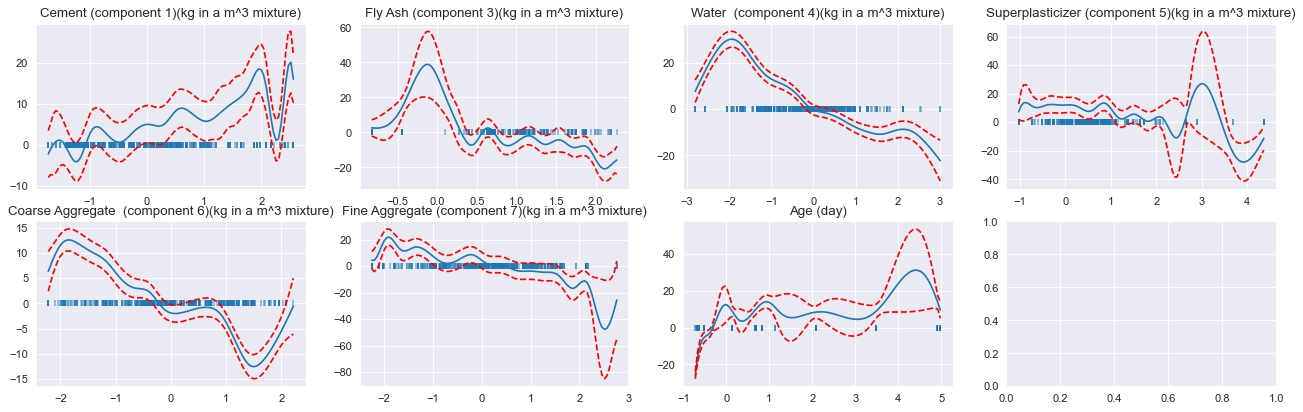

In [98]:
partial_dependence(model=gam2)

A partir de los gráficos de dependencia parcial visualizamos que:

* Cement: mayor cantidad se traduce en mejor resistencia del concreto
* Fly Ash: relación negativa, fomenta la baja en la resistencia a mayores niveles; sin embargo, a niveles bajos interactúa de forma positiva con la resistencia
* Water: relación negativa, fomenta la baja en la resistencia a mayores niveles; sin embargo, a niveles bajos interactúa de forma positiva con la resistencia
* Superplasticizer: no demuestra incidencia específica sobre la variable
* Coarse Aggregate: en un inicio se relaciona a mayores niveles de resistencia, pero a medida que continua aumentando, genera pérdidas en la resistencia del concreto
* Fine Aggregate: no demuestra incidencia específica sobre la variable
* Age: a mayores días existe mejor resistencia del concreto